In [8]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load in 

import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
from datetime import datetime
from zipfile import ZipFile
import io

%matplotlib inline

In [9]:
def read_zip(zip_fn, extract_fn=None):
    zf = ZipFile(zip_fn)
    if extract_fn:
        return zf.read(extract_fn)
    else:
        return {name:zf.read(name) for name in zf.namelist()}

In [11]:
df = pd.read_excel(io.BytesIO(read_zip('Online Retail.xlsx.zip', 'Online Retail.xlsx')))

In [12]:
df.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom


# Questions 
**I will list all questions which i need to answer through the dataset.**<br> 
**1- What is the total amount of purchases for each customer and who is the most and less customer has paid.**<br> 
**2- How many products have been bought by each customer and who is the customer who has bought the highest  and the least number of products.**<br> 
**3- What is the sales' average of each customer  and what is the average of products have been sold at each country**<br>
**4- Which month has the highest total amount overall countries and at each country also.**<br>


# Data Wrangling


In [13]:
df=df[['CustomerID','InvoiceNo','StockCode','Quantity','UnitPrice','Description','InvoiceDate','Country']]

In [14]:
# Calculate the total sales of each product
TotalAmount = df['Quantity'] * df['UnitPrice']
df.insert(loc=5,column='TotalAmount',value=TotalAmount)

In [15]:
new_df = df[['CustomerID','InvoiceNo','StockCode','Quantity','TotalAmount','InvoiceDate','Country']]

## EDA

**1- What is the total amount of purchases for each customer and who is the most and less customer has paid.**<br> 



In [17]:
import warnings
warnings.filterwarnings('ignore')

# Show top 10 customers, max and min amounts paid   
res_df = new_df.groupby(['CustomerID']).sum()
res_df.sort_values('TotalAmount',ascending=False,inplace=True)
final_df = res_df[(res_df['Quantity'] > 0) & (res_df['TotalAmount'] > 0)]

print('customer Id {} who paid the maximum amount {}'.format(int(final_df['TotalAmount'].argmax()),final_df['TotalAmount'].max()))
print('customer Id {} who paid the minimum amount {}'.format(int(final_df['TotalAmount'].argmin()),final_df['TotalAmount'].min()))

final_df.head(10)

customer Id 14646 who paid the maximum amount 279489.0199999999
customer Id 16446 who paid the minimum amount 2.8999999999941792


,Quantity,TotalAmount
CustomerID,,
14646.0,196719,279489.02
18102.0,64122,256438.49
17450.0,69029,187482.17
14911.0,77180,132572.62
12415.0,77242,123725.45
14156.0,57025,113384.14
17511.0,63012,88125.38
16684.0,49390,65892.08
13694.0,61803,62653.10


In [18]:
# total sales at each country, how many quantites sold at each country 
country_df = new_df.groupby(['Country']).sum()
country_df.sort_values('TotalAmount',ascending=False,inplace=True)
country_df.drop('CustomerID',axis=1,inplace=True)
country_df.head()

,Quantity,TotalAmount
Country,,
United Kingdom,4263829,8.187806e+06
Netherlands,200128,2.846615e+05
EIRE,142637,2.632768e+05
Germany,117448,2.216982e+05
France,110480,1.974039e+05


**How many products have been bought by each customer and who is the customer who has bought the highest  and the least number of products.**<br>


In [20]:
# show the min and max quantites has sold. 
print('The minimum number of products has been bought is {} by customer id {} '.format(final_df['Quantity'].min(),final_df['Quantity'].argmin()))
print('The maximum number of products has been bought is {} by customer id {} '.format(final_df['Quantity'].max(),final_df['Quantity'].argmax()))
new_df.groupby('Country').mean().head()

The minimum number of products has been bought is 1 by customer id 17846.0 
The maximum number of products has been bought is 196719 by customer id 14646.0 


,CustomerID,Quantity,TotalAmount
Country,,,
Australia,12464.656076,66.444003,108.877895
Austria,12521.451372,12.037406,25.322494
Bahrain,12354.529412,13.684211,28.863158
Belgium,12430.298695,11.189947,19.773301
Brazil,12769.000000,11.125000,35.737500


In [21]:
avg_quan = new_df[['Quantity','TotalAmount','Country','InvoiceNo','CustomerID']]

In [22]:
## Top 10 customers sales overall countries sorted by totalamount
avg_sum = avg_quan.groupby(['Country','CustomerID']).sum() 
avg_sum.sort_values('TotalAmount',ascending=False).head(10)

Quantity  TotalAmount
Country        CustomerID                       
Netherlands    14646.0       196719    279489.02
United Kingdom 18102.0        64122    256438.49
               17450.0        69029    187482.17
EIRE           14911.0        77180    132572.62
Australia      12415.0        77242    123725.45
EIRE           14156.0        57025    113384.14
United Kingdom 17511.0        63012     88125.38
               16684.0        49390     65892.08
               13694.0        61803     62653.10
               15311.0        37720     59419.34

In [23]:
## average of paid amount by each customer at each country ordered by number of invoices.
avg_cus = df[['Quantity','TotalAmount','Country','InvoiceNo']].copy()

x = avg_cus.groupby(['Country','InvoiceNo']).sum()

x['Ones']=1
y = x.groupby('Country').sum()
y['AVG'] = y['TotalAmount'] / y['Ones']
y.sort_values(['Ones','AVG'],ascending=False,inplace=True)
y.head()

,Quantity,TotalAmount,Ones,AVG
Country,,,,
United Kingdom,4263829,8187806.364,23494,348.506272
Germany,117448,221698.210,603,367.658723
France,110480,197403.900,461,428.208026
EIRE,142637,263276.820,360,731.324500
Belgium,23152,40910.960,119,343.789580


In [24]:
## Average of amount paid by the customers overall countries
y['TotalAmount'].sum() / y['Quantity'].sum()

1.883095158651216

Text(0.5, 0, 'Country')

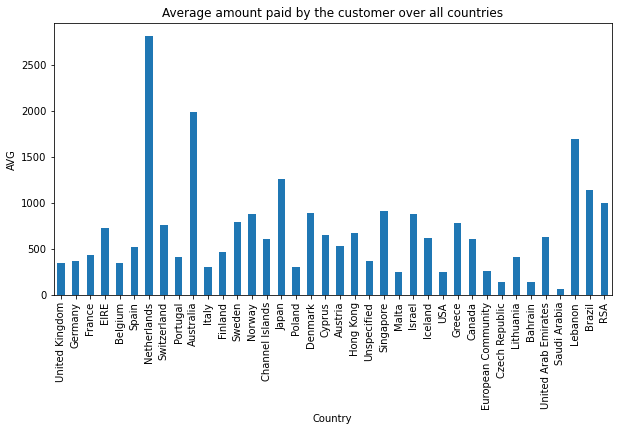

In [25]:
y['AVG'].plot(kind='bar',figsize=(10,5),title='Average amount paid by the customer over all countries')
plt.ylabel('AVG')
plt.xlabel('Country')

We noticed that the higest average paid through customer is in Netherlands and lowest amount paid in Saudi Arabia

**5- Which month has the highest total amount overall countries and at each country also..**<br>


In [26]:
modifed_df = new_df[['Quantity','TotalAmount','InvoiceDate','Country']].copy()
modifed_df['Month'] = modifed_df['InvoiceDate'].dt.month 
modifed_df['Year'] = modifed_df['InvoiceDate'].dt.year 

In [27]:
date_df = modifed_df.groupby(['Year','Month']).sum()
total_values = date_df.sort_values('TotalAmount',ascending=False)
total_values

Quantity  TotalAmount
Year Month                       
2011 11       740286  1461756.250
     10       570532  1070704.670
     9        549817  1019687.622
2010 12       342228   748957.020
2011 5        380391   723333.510
     6        341623   691123.120
     3        351872   683267.080
     8        406199   682680.510
     7        391116   681300.111
     1        308966   560000.260
     2        277989   498062.650
     4        289098   493207.121
     12       226333   433668.010

Text(0, 0.5, 'Quantity, total Amount')

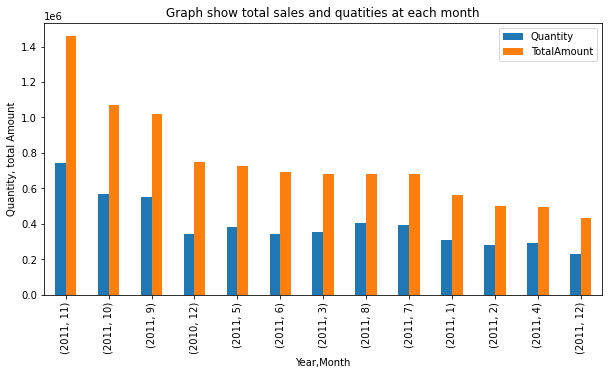

In [28]:
total_values.plot(kind='bar',figsize=(10,5),title='Graph show total sales and quatities at each month')
plt.ylabel('Quantity, total Amount')

In [29]:
# I showed which month at each country has the higest total sales    
country_df = modifed_df.groupby('Country').max()
country_df.sort_values('TotalAmount',ascending=False,inplace=True)
country_df

,Quantity,TotalAmount,InvoiceDate,Month,Year
Country,,,,,
United Kingdom,80995,168469.60,2011-12-09 12:49:00,12,2011
Netherlands,2400,4992.00,2011-12-08 12:12:00,12,2011
France,912,4161.06,2011-12-09 12:50:00,12,2011
Singapore,288,3949.32,2011-10-19 11:18:00,10,2011
Japan,2040,3794.40,2011-12-06 11:40:00,12,2011
Hong Kong,144,2653.95,2011-11-14 13:27:00,11,2011
EIRE,1440,2365.20,2011-12-08 15:54:00,12,2011
Australia,1152,1718.40,2011-11-24 12:30:00,12,2011
Spain,360,1350.00,2011-12-07 17:05:00,12,2011


**We notice that december is the highest month of sales for many countries but november is the highest month overall months for all countries, Now we want how many minutes the customer needs to pay all of his purchases **

** 6- Sales Average of each product at each country at each monthly. **

In [30]:
## Total sales for each product

df_1=df[['StockCode','Description','Quantity','TotalAmount','Country','InvoiceDate']]
product_totalsales_df = df_1.groupby(['Country','StockCode','Description']).sum()
product_totalsales_df = product_totalsales_df[ (product_totalsales_df['Quantity'] > 0) & (product_totalsales_df['TotalAmount'] >0) ]
product_totalsales_df = product_totalsales_df[product_totalsales_df['TotalAmount'] >= 1000 ]

product_totalsales_df.sort_values('TotalAmount',ascending=False)

Quantity  \
Country        StockCode Description                                     
United Kingdom DOT       DOTCOM POSTAGE                            707   
               22423     REGENCY CAKESTAND 3 TIER                10376   
               47566     PARTY BUNTING                           16709   
               85123A    WHITE HANGING HEART T-LIGHT HOLDER      32901   
               85099B    JUMBO BAG RED RETROSPOT                 43167   
...                                                                ...   
               22755     SMALL PURPLE BABUSHKA NOTEBOOK           1315   
               21464     DISCO BALL ROTATOR BATTERY OPERATED       237   
               22915     ASSORTED BOTTLE TOP  MAGNETS             2174   
               21824     PAINTED METAL STAR WITH HOLLY BELLS      1725   
               23469     CARD HOLDER LOVE BIRD SMALL               232   

                                                              TotalAmount  
Country        StockCode Description                                       
United Kingdom DOT       DOTCOM POSTAGE                         206245.48  
               22423     REGENCY CAKESTAND 3 TIER               134405.94  
               47566     PARTY BUNTING                           92501.73  
               85123A    WHITE HANGING HEART T-LIGHT HOLDER      92000.59  
               85099B    JUMBO BAG RED RETROSPOT                 84516.44  
...                                                                   ...  
               22755     SMALL PURPLE BABUSHKA NOTEBOOK           1004.64  
               21464     DISCO BALL ROTATOR BATTERY OPERATED      1004.25  
               22915     ASSORTED BOTTLE TOP  MAGNETS             1002.86  
               21824     PAINTED METAL STAR WITH HOLLY BELLS      1002.49  
               23469     CARD HOLDER LOVE BIRD SMALL              1002.16  

[1669 rows x 2 columns]

**Sales Average of each product overall, at each country and each monthly. **

In [31]:
## Sales Average of each product overall countries 

Avgsales_product = df_1.groupby(['StockCode','Description']).mean()

Avgsales_product = Avgsales_product[ (Avgsales_product['Quantity'] > 0) & (Avgsales_product['TotalAmount'] >0) ]
Avgsales_product = Avgsales_product[Avgsales_product['TotalAmount'] >= 100 ]

Avgsales_product.sort_values('TotalAmount',ascending=False)


,,Quantity,TotalAmount
StockCode,Description,,
22502,PICNIC BASKET WICKER 60 PIECES,30.500000,19809.750000
47556B,TEA TIME TEA TOWELS,1300.000000,3022.500000
23131,MISELTOE HEART WREATH CREAM,240.000000,996.000000
20914,SET/5 RED SPOTTY LID GLASS BOWLS,288.000000,734.400000
22275,WEEKEND BAG VINTAGE ROSE PAISLEY,69.000000,527.850000
22833,HALL CABINET WITH 3 DRAWERS,15.200000,520.706000
22830,UTILTY CABINET WITH HOOKS,21.833333,435.048333
21897,POTTING SHED CANDLE CITRONELLA,135.000000,422.730000
21769,VINTAGE POST OFFICE CABINET,5.500000,303.825000


In [32]:
## total sales for each product at each country

Total_sales_product = df_1.groupby(['Country','StockCode']).sum()

Total_sales_product = Total_sales_product[ (Total_sales_product['Quantity'] > 0) & (Total_sales_product['TotalAmount'] >0) ]
Total_sales_product = Total_sales_product[Total_sales_product['TotalAmount'] >= 100 ]

Total_sales_product

Quantity  TotalAmount
Country        StockCode                          
Australia      15036              600       432.00
               20675              216       228.96
               20676              216       228.96
               20677              216       228.96
               20685               50       349.50
...                               ...          ...
United Kingdom DOT               1707    206245.48
               gift_0001_20        20       167.05
               gift_0001_30        37       175.53
               gift_0001_40         3       100.70
               gift_0001_50         4       167.56

[6050 rows x 2 columns]

In [33]:
df_1['Month'] = df_1['InvoiceDate'].dt.month.copy()

In [34]:
## total sales of product at each month at each country I made filter on total sales >= 100

df_1 = df_1[ (df_1['Quantity'] > 0) & (df_1['TotalAmount'] >0) ]
df_1 = df_1[df_1['TotalAmount'] >= 100 ]

df_1.groupby(['Country','Month','StockCode','Description']).sum()

Quantity  \
Country        Month StockCode Description                                    
Australia      1     20685     DOORMAT RED RETROSPOT                     20   
                     21242     RED RETROSPOT PLATE                       96   
                     21243     PINK  POLKADOT PLATE                      96   
                     21244     BLUE POLKADOT PLATE                       96   
                     21891     TRADITIONAL WOODEN SKIPPING ROPE         144   
...                                                                     ...   
United Kingdom 12    85123A    WHITE HANGING HEART T-LIGHT HOLDER      1871   
                     85123a    WHITE HANGING HEART T-LIGHT HOLDER       112   
                     AMAZONFEE AMAZON FEE                                 1   
                     DOT       DOTCOM POSTAGE                            66   
                     M         Manual                                   803   

                                                                   TotalAmount  
Country        Month StockCode Description                                      
Australia      1     20685     DOORMAT RED RETROSPOT                    135.00  
                     21242     RED RETROSPOT PLATE                      139.20  
                     21243     PINK  POLKADOT PLATE                     139.20  
                     21244     BLUE POLKADOT PLATE                      139.20  
                     21891     TRADITIONAL WOODEN SKIPPING ROPE         152.64  
...                                                                        ...  
United Kingdom 12    85123A    WHITE HANGING HEART T-LIGHT HOLDER      4861.77  
                     85123a    WHITE HANGING HEART T-LIGHT HOLDER       758.24  
                     AMAZONFEE AMAZON FEE                             13541.33  
                     DOT       DOTCOM POSTAGE                         44327.32  
                     M         Manual                                  2642.49  

[7120 rows x 2 columns]